<a href="https://colab.research.google.com/github/songmac/2023-Sesac-Lecture-and-Project/blob/master/231013_%EB%8B%A8%EC%96%B4%EC%9D%98%ED%91%9C%ED%98%84_BOW%2C_TDM%2C_TFIDF(review_needed).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 실습1-1. BOW 직접 구현 하기 (solved)

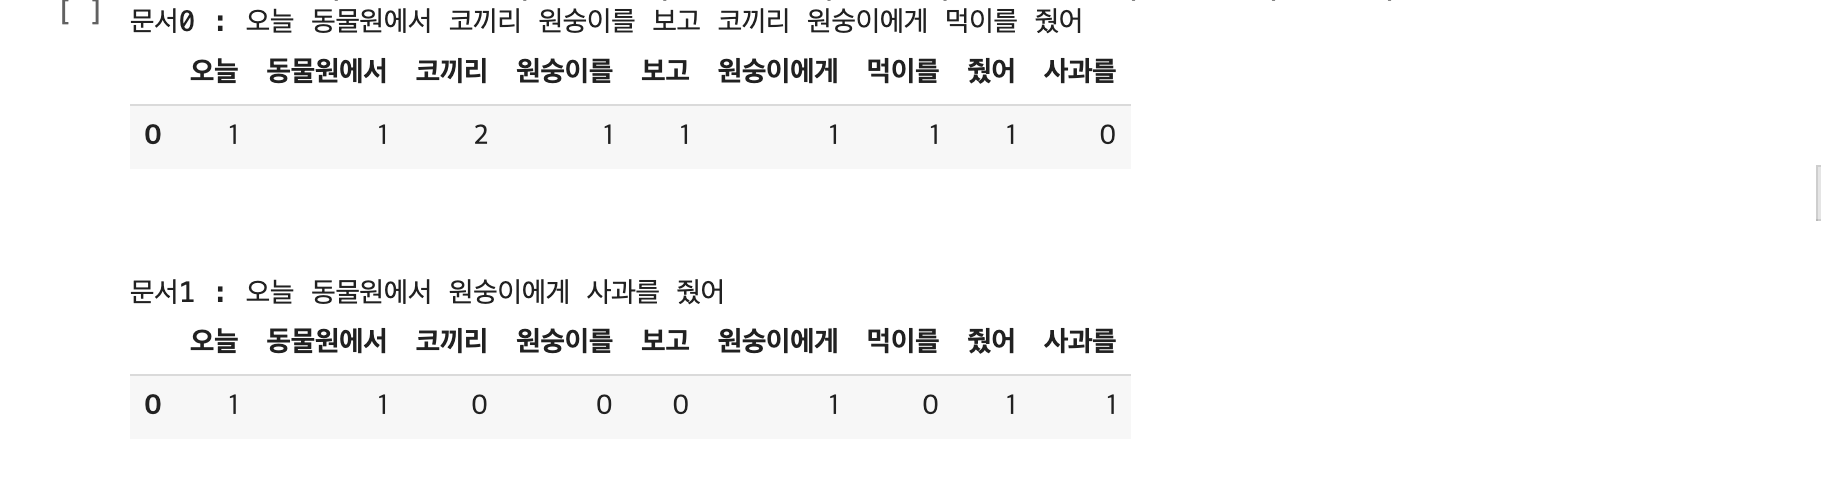

In [ ]:
# 1. 문서에서 유니크한 단어를 뽑고 인덱스를 부여한다.
# 2. 각 단어가 몇 번 나왔는지 숫자를 센다.
# 3. index, count 된 단어 인덱스를 통해 다시 단어로 변환한다.

from IPython.display import display
import pandas as pd


sentences = ['오늘 동물원에서 코끼리 원숭이를 보고 코끼리 원숭이에게 먹이를 줬어',
             '오늘 동물원에서 원숭이에게 사과를 줬어']

# sentences에서 단어 토큰을 추출하여 고유한 word으로 만드는 함수 (문장 2개 기준)
def sentences_to_words(sentences):

    words = []
    for sentence in sentences:
        for token in  sentence.split(): ##문장 2개 토큰으로 분할
            if not token in words: #토큰 중복 제거
                words.append(token) #나열
    return words #중복된 토큰을 제외한 단어들 나열

words = sentences_to_words(sentences)


# 생성한 words을 이용하여 문장을 벡터로 변환하는 함수 (문장 1개 기준)
def sentences_to_word_counts(words, sentences):
    word_counts = []
    for sentence in sentences:
        counts = {word: sentence.split().count(word) for word in words}
        word_counts.append(counts)
    return word_counts

word_counts = sentences_to_word_counts(words, sentences)


df = pd.DataFrame(word_counts, columns=words)

display(df)

# display(df.T)

,오늘,동물원에서,코끼리,원숭이를,보고,원숭이에게,먹이를,줬어,사과를
0,1,1,2,1,1,1,1,1,0
1,1,1,0,0,0,1,0,1,1


,0,1
오늘,1,1
동물원에서,1,1
코끼리,2,0
원숭이를,1,0
보고,1,0
원숭이에게,1,1
먹이를,1,0
줬어,1,1
사과를,0,1


In [ ]:
print("전체 vocab의 수: {}개".format(len(vocabs))) #유니크 토큰 출력

전체 vocab의 수: 9개


# 실습 1-2. BOW 직접 구현(강의 코드)

In [11]:
docs = ['오늘 동물원에서 코끼리 원숭이를 보고 코끼리 원숭이에게 먹이를 줬어',
        '오늘 동물원에서 원숭이에게 사과를 줬어']

1. 토큰화 : 공백으로 토큰화 진행

In [12]:
doc_ls = []
for doc in docs:
  doc_ls.append(doc.split(' '))
doc_ls

[['오늘', '동물원에서', '코끼리', '원숭이를', '보고', '코끼리', '원숭이에게', '먹이를', '줬어'],
 ['오늘', '동물원에서', '원숭이에게', '사과를', '줬어']]

2. 유니크한 토큰 사전 구하기
> 2-1. 빈 딕셔너리 생성



In [13]:
from collections import defaultdict

word2id = defaultdict(lambda : len(word2id)) #lambda 인자: 표현식
          # lambda 라는 키워드를 입력하고 뒤에는 매개변수(인자)를 입력
          # 콜론(:)을 넣은다음에 그 매개변수(인자)를 이용한 동작들을 적음
          # ex. lambda x : x * 2
word2id

defaultdict(<function __main__.<lambda>()>, {})



> 2-2. 위에서 생성한 빈 딕셔너리에 유니크한 토큰 넣기



In [14]:
for doc in doc_ls:
  print(doc)

  for token in doc:
    word2id[token] #딕셔너리에 토큰 집어넣기
    print(token)
    print('\t', word2id)

['오늘', '동물원에서', '코끼리', '원숭이를', '보고', '코끼리', '원숭이에게', '먹이를', '줬어']
오늘
	 defaultdict(<function <lambda> at 0x7d82043b08b0>, {'오늘': 0})
동물원에서
	 defaultdict(<function <lambda> at 0x7d82043b08b0>, {'오늘': 0, '동물원에서': 1})
코끼리
	 defaultdict(<function <lambda> at 0x7d82043b08b0>, {'오늘': 0, '동물원에서': 1, '코끼리': 2})
원숭이를
	 defaultdict(<function <lambda> at 0x7d82043b08b0>, {'오늘': 0, '동물원에서': 1, '코끼리': 2, '원숭이를': 3})
보고
	 defaultdict(<function <lambda> at 0x7d82043b08b0>, {'오늘': 0, '동물원에서': 1, '코끼리': 2, '원숭이를': 3, '보고': 4})
코끼리
	 defaultdict(<function <lambda> at 0x7d82043b08b0>, {'오늘': 0, '동물원에서': 1, '코끼리': 2, '원숭이를': 3, '보고': 4})
원숭이에게
	 defaultdict(<function <lambda> at 0x7d82043b08b0>, {'오늘': 0, '동물원에서': 1, '코끼리': 2, '원숭이를': 3, '보고': 4, '원숭이에게': 5})
먹이를
	 defaultdict(<function <lambda> at 0x7d82043b08b0>, {'오늘': 0, '동물원에서': 1, '코끼리': 2, '원숭이를': 3, '보고': 4, '원숭이에게': 5, '먹이를': 6})
줬어
	 defaultdict(<function <lambda> at 0x7d82043b08b0>, {'오늘': 0, '동물원에서': 1, '코끼리': 2, '원숭이를': 3, '보고': 4, '원숭이에게': 5

In [15]:
word2id

defaultdict(<function __main__.<lambda>()>,
            {'오늘': 0,
             '동물원에서': 1,
             '코끼리': 2,
             '원숭이를': 3,
             '보고': 4,
             '원숭이에게': 5,
             '먹이를': 6,
             '줬어': 7,
             '사과를': 8})

2. BOW 구하기

In [16]:
import numpy as np
BoW_ls = []
for i, doc in enumerate(doc_ls):
  bow = np.zeros(len(word2id), dtype=int)
  print(bow)
  for token in doc:
    bow[word2id[token]] +=1 #다음 토큰으로 넘어가기
    print(token, ' => ', bow) #token 출력
  BoW_ls.append(bow.tolist())

[0 0 0 0 0 0 0 0 0]
오늘  =>  [1 0 0 0 0 0 0 0 0]
동물원에서  =>  [1 1 0 0 0 0 0 0 0]
코끼리  =>  [1 1 1 0 0 0 0 0 0]
원숭이를  =>  [1 1 1 1 0 0 0 0 0]
보고  =>  [1 1 1 1 1 0 0 0 0]
코끼리  =>  [1 1 2 1 1 0 0 0 0]
원숭이에게  =>  [1 1 2 1 1 1 0 0 0]
먹이를  =>  [1 1 2 1 1 1 1 0 0]
줬어  =>  [1 1 2 1 1 1 1 1 0]
[0 0 0 0 0 0 0 0 0]
오늘  =>  [1 0 0 0 0 0 0 0 0]
동물원에서  =>  [1 1 0 0 0 0 0 0 0]
원숭이에게  =>  [1 1 0 0 0 1 0 0 0]
사과를  =>  [1 1 0 0 0 1 0 0 1]
줬어  =>  [1 1 0 0 0 1 0 1 1]


In [17]:
BoW_ls

[[1, 1, 2, 1, 1, 1, 1, 1, 0], [1, 1, 0, 0, 0, 1, 0, 1, 1]]

In [18]:
from IPython.core import display as ICD
import pandas as pd
sorted_vocab = sorted((value, key) for key, value in word2id.items())
print('sorted_vocab', sorted_vocab)

vocab = []
for v in sorted_vocab:
  vocab.append(v[1])
print('vocab', vocab)
for i in range(len(docs)) :
  print("문서{} : {}".format(i, docs[i]))
  ICD.display(pd.DataFrame([BoW_ls[i]], columns=vocab))
  print("\n\n")

sorted_vocab [(0, '오늘'), (1, '동물원에서'), (2, '코끼리'), (3, '원숭이를'), (4, '보고'), (5, '원숭이에게'), (6, '먹이를'), (7, '줬어'), (8, '사과를')]
vocab ['오늘', '동물원에서', '코끼리', '원숭이를', '보고', '원숭이에게', '먹이를', '줬어', '사과를']
문서0 : 오늘 동물원에서 코끼리 원숭이를 보고 코끼리 원숭이에게 먹이를 줬어


,오늘,동물원에서,코끼리,원숭이를,보고,원숭이에게,먹이를,줬어,사과를
0,1,1,2,1,1,1,1,1,0





문서1 : 오늘 동물원에서 원숭이에게 사과를 줬어


,오늘,동물원에서,코끼리,원숭이를,보고,원숭이에게,먹이를,줬어,사과를
0,1,1,0,0,0,1,0,1,1


# 실습1-3. BoW sklearn으로 구현하기 (solved)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df = 1, ngram_range = (1,1)) #mid_df : 토큰이 나타날 최소 문서의 수 ??
                                                              #max_df : 특정 횟수 이상 나오는 것을 무시하도록 설정
                                                              #min_df : 특정 횟수 이하로 나오는 것을 무시하도록 설정


corpus = ['오늘 동물원에서 코끼리 원숭이를 보고 코끼리 원숭이에게 먹이를 줬어',
          '오늘 동물원에서 원숭이에게 사과를 줬어'
         ]


features = vectorizer.fit_transform(corpus) #학습/변환 한번에 처리
print(features)

  (0, 4)	1
  (0, 0)	1
  (0, 8)	2
  (0, 5)	1
  (0, 2)	1
  (0, 6)	1
  (0, 1)	1
  (0, 7)	1
  (1, 4)	1
  (1, 0)	1
  (1, 6)	1
  (1, 7)	1
  (1, 3)	1


In [ ]:
features.shape

(2, 9)

In [ ]:
vocab = vectorizer.get_feature_names_out()
print(len(vocab))
vocab[:10]

9


array(['동물원에서', '먹이를', '보고', '사과를', '오늘', '원숭이를', '원숭이에게', '줬어', '코끼리'],
      dtype=object)

In [ ]:
pd.DataFrame(features.toarray(), columns = vocab)

,동물원에서,먹이를,보고,사과를,오늘,원숭이를,원숭이에게,줬어,코끼리
0,1,1,1,0,1,1,1,1,2
1,1,0,0,1,1,0,1,1,0


# 실습 2. 단어의 순서를 고려하지 않은 BOW

In [ ]:
# 강사님 실습 코드

# 실습 3-1. TDM 직접구현 (solved)

In [ ]:
from IPython.display import display
import pandas as pd

docs = ['동물원 코끼리',
        '동물원 원숭이 바나나',
        '엄마 코끼리 아기 코끼리',
        '원숭이 바나나 코끼리 바나나']

# docs에서 단어 토큰을 추출하여 고유한 vocab으로 만드는 함수 (문장 2개 기준)
def docs_to_vocabs(docs):

    vocabs = []
    for sentence in docs:
        for token in  sentence.split(): ##문장 2개 토큰으로 분할
            if not token in vocabs: #토큰 중복 제거
                vocabs.append(token) #나열
    return vocabs #중복된 토큰을 제외한 단어들 나열

vocabs = docs_to_vocabs(docs)


# 생성한 vocabs을 이용하여 문장을 벡터로 변환하는 함수 (문장 1개 기준)
def docs_to_vocab_counts(vocabs, docs):
    vocab_counts = []
    for sentence in docs:
        counts = {vocab: sentence.split().count(vocab) for vocab in vocabs}
        vocab_counts.append(counts)
    return vocab_counts

vocab_counts = docs_to_vocab_counts(vocabs, docs)


df = pd.DataFrame(word_counts, columns=vocabs)

# display(df)

In [ ]:
display(df.T)

,0,1,2,3
동물원,1,1,0,0
코끼리,1,0,2,1
원숭이,0,1,0,1
바나나,0,1,0,2
엄마,0,0,1,0
아기,0,0,1,0


# 실습 3-2. TDM sklearn 구현 (solved)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df = 1, ngram_range = (1,1)) #mid_df : 토큰이 나타날 최소 문서의 수 ??
                                                              #max_df : 특정 횟수 이상 나오는 것을 무시하도록 설정
                                                              #min_df : 특정 횟수 이하로 나오는 것을 무시하도록 설정

docs = ['동물원 코끼리',
        '동물원 원숭이 바나나',
        '엄마 코끼리 아기 코끼리',
        '원숭이 바나나 코끼리 바나나']


features = vectorizer.fit_transform(docs) #학습/변환 한번에 처리
df = pd.DataFrame(features.toarray(), columns = vocab)
display(df.T)

,0,1,2,3
동물원,1,1,0,0
바나나,0,1,0,2
아기,0,0,1,0
엄마,0,0,1,0
원숭이,0,1,0,1
코끼리,1,0,2,1


# 실습 4. TF-IDF 구현하기

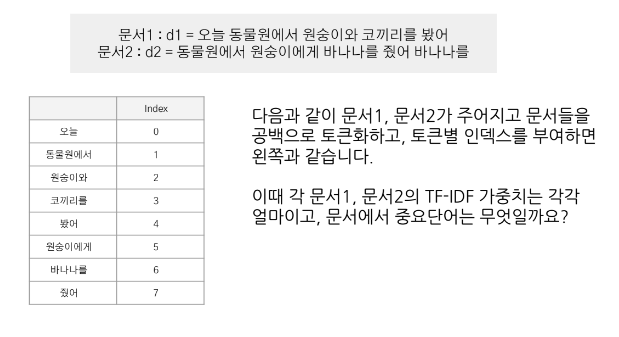

계산순서
1. 토큰 Index 생성
2. TF 계산(ex. 문서1내 토큰등장 빈도/문서1내 토큰등장 빈도)
3. IDF 계산(log(총문서수(N)/단어가 등장한 문서 수(nt)))
4. TF x IDF 계산



> 1. 토큰 Index 생성
- 공백으로 토큰화 진행
-  빈 딕셔너리에 유티크한 토큰 넣기



In [98]:
import pandas as pd
import numpy as np
from collections import defaultdict
from IPython.display import display


docs = ['오늘 동물원에서 원숭이와 코끼리를 봤어',
        '동물원에서 원숭이에게 바나나를 줬어 바나나를']

doc_ls = []
for doc in docs:
  doc_ls.append(doc.split(' '))

word2id = defaultdict(lambda : len(word2id))
word2id

defaultdict(<function __main__.<lambda>()>, {})

In [99]:
for doc in doc_ls:
  print(doc)
  for token in doc:
    word2id[token] #딕셔너리에 토큰 집어넣기
    print(token)
    print('\t', word2id)

['오늘', '동물원에서', '원숭이와', '코끼리를', '봤어']
오늘
	 defaultdict(<function <lambda> at 0x7d8200ad7e20>, {'오늘': 0})
동물원에서
	 defaultdict(<function <lambda> at 0x7d8200ad7e20>, {'오늘': 0, '동물원에서': 1})
원숭이와
	 defaultdict(<function <lambda> at 0x7d8200ad7e20>, {'오늘': 0, '동물원에서': 1, '원숭이와': 2})
코끼리를
	 defaultdict(<function <lambda> at 0x7d8200ad7e20>, {'오늘': 0, '동물원에서': 1, '원숭이와': 2, '코끼리를': 3})
봤어
	 defaultdict(<function <lambda> at 0x7d8200ad7e20>, {'오늘': 0, '동물원에서': 1, '원숭이와': 2, '코끼리를': 3, '봤어': 4})
['동물원에서', '원숭이에게', '바나나를', '줬어', '바나나를']
동물원에서
	 defaultdict(<function <lambda> at 0x7d8200ad7e20>, {'오늘': 0, '동물원에서': 1, '원숭이와': 2, '코끼리를': 3, '봤어': 4})
원숭이에게
	 defaultdict(<function <lambda> at 0x7d8200ad7e20>, {'오늘': 0, '동물원에서': 1, '원숭이와': 2, '코끼리를': 3, '봤어': 4, '원숭이에게': 5})
바나나를
	 defaultdict(<function <lambda> at 0x7d8200ad7e20>, {'오늘': 0, '동물원에서': 1, '원숭이와': 2, '코끼리를': 3, '봤어': 4, '원숭이에게': 5, '바나나를': 6})
줬어
	 defaultdict(<function <lambda> at 0x7d8200ad7e20>, {'오늘': 0, '동물원에서': 1, '원숭이와': 2, '코끼리를

In [100]:
word2id

defaultdict(<function __main__.<lambda>()>,
            {'오늘': 0,
             '동물원에서': 1,
             '원숭이와': 2,
             '코끼리를': 3,
             '봤어': 4,
             '원숭이에게': 5,
             '바나나를': 6,
             '줬어': 7})

> 2. TF 계산하기
- TF = 특정단어등장빈도/문서내 전체등장단어빈도



In [101]:
#tf 계산 과정

import numpy as np

TDM = np.zeros((len(word2id), len(doc_ls)), dtype=int)

for i, doc in enumerate(doc_ls):
  print(doc)
  for token in doc:
    TDM[word2id[token], i] += 1 #해당 토큰의 위치(column)
    print(token)
    print(TDM)
    print('\t')

['오늘', '동물원에서', '원숭이와', '코끼리를', '봤어']
오늘
[[1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]
	
동물원에서
[[1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]
	
원숭이와
[[1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]
	
코끼리를
[[1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]
	
봤어
[[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]]
	
['동물원에서', '원숭이에게', '바나나를', '줬어', '바나나를']
동물원에서
[[1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]]
	
원숭이에게
[[1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]]
	
바나나를
[[1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 0]]
	
줬어
[[1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]]
	
바나나를
[[1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 2]
 [0 1]]
	


In [102]:
# tf 함수로 구현하기

def computeTF(TDM):
  doc_len = len(docs)
  word_len = len(word2id)
  print('문서수 : ', doc_len)
  print('전체 단어수 : ', word_len)

  tf = np.zeros((word_len, doc_len))
  print(tf)

  for doc_i in range(len(doc_ls)): #빈도 조사(investigation)
    print(docs[doc_i])
    for word_i in range(len(word2id)):
      tf[word_i, doc_i] = TDM[word_i, doc_i]/TDM[:, doc_i].sum()
    print(tf)
  return tf

In [103]:
tf = computeTF(TDM)

문서수 :  2
전체 단어수 :  8
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
오늘 동물원에서 원숭이와 코끼리를 봤어
[[0.2 0. ]
 [0.2 0. ]
 [0.2 0. ]
 [0.2 0. ]
 [0.2 0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]]
동물원에서 원숭이에게 바나나를 줬어 바나나를
[[0.2 0. ]
 [0.2 0.2]
 [0.2 0. ]
 [0.2 0. ]
 [0.2 0. ]
 [0.  0.2]
 [0.  0.4]
 [0.  0.2]]


In [104]:
tf

array([[0.2, 0. ],
       [0.2, 0.2],
       [0.2, 0. ],
       [0.2, 0. ],
       [0.2, 0. ],
       [0. , 0.2],
       [0. , 0.4],
       [0. , 0.2]])



> 3. IDF 계산하기
- IDF = - log10(단어가등장한문서수/총문서수)


In [109]:
import math

def computeIDF(TDM):
  doc_len = len(docs)
  word_len = len(word2id)
  print('문서수 :', doc_len)
  print('전체 단어수 : ', word_len)

  idf = np.zeros(word_len)
  print(idf)

  for doc_i in range(len(doc_ls)):  #빈도 조사(investigation)
    for word_i in range(len(word2id)) :
      idf[word_i] = -math.log10(np.count_nonzero(TDM[word_i, :]) / doc_len)

  print(idf)
  return idf

  idf = computeIDF(TDM)
  idf



> 4. TF-IDF 계산하기
- TF-IDF 곱



In [110]:
def computeTFIDF(TDM):
  tf = computeTF(TDM)
  idf = computeIDF(TDM).T
  tfidf = np.zeros(tf.shape)

  for doc_i in range(len(doc_ls)):
    print(docs[doc_i])
    for word_i in range(len(word2id)):
      tfidf[word_i, doc_i] = tf[word_i, doc_i] * idf[word_i]

  print('TF-IDF 최종')
  print(tfidf)
  return tfidf

In [111]:
tfidf = computeTFIDF(TDM)

문서수 :  2
전체 단어수 :  8
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
오늘 동물원에서 원숭이와 코끼리를 봤어
[[0.2 0. ]
 [0.2 0. ]
 [0.2 0. ]
 [0.2 0. ]
 [0.2 0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]]
동물원에서 원숭이에게 바나나를 줬어 바나나를
[[0.2 0. ]
 [0.2 0.2]
 [0.2 0. ]
 [0.2 0. ]
 [0.2 0. ]
 [0.  0.2]
 [0.  0.4]
 [0.  0.2]]
문서수 : 2
전체 단어수 :  8
[0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.30103 -0.       0.30103  0.30103  0.30103  0.30103  0.30103  0.30103]
오늘 동물원에서 원숭이와 코끼리를 봤어
동물원에서 원숭이에게 바나나를 줬어 바나나를
TF-IDF 최종
[[ 0.060206  0.      ]
 [-0.       -0.      ]
 [ 0.060206  0.      ]
 [ 0.060206  0.      ]
 [ 0.060206  0.      ]
 [ 0.        0.060206]
 [ 0.        0.120412]
 [ 0.        0.060206]]




> 5. 시각화로 확인



In [112]:
import pandas as pd

sorted_vocag = sorted((value, key) for key, value in word2id.items())
vocab = [v[1] for v in sorted_vocab]
print('vocab : ', vocab)
tfidf = computeTFIDF(TDM)
pd.DataFrame(tfidf.T, columns=vocab)

vocab :  ['오늘', '동물원에서', '원숭이와', '코끼리를', '봤어', '원숭이에게', '바나나를', '줬어']
문서수 :  2
전체 단어수 :  8
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
오늘 동물원에서 원숭이와 코끼리를 봤어
[[0.2 0. ]
 [0.2 0. ]
 [0.2 0. ]
 [0.2 0. ]
 [0.2 0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]]
동물원에서 원숭이에게 바나나를 줬어 바나나를
[[0.2 0. ]
 [0.2 0.2]
 [0.2 0. ]
 [0.2 0. ]
 [0.2 0. ]
 [0.  0.2]
 [0.  0.4]
 [0.  0.2]]
문서수 : 2
전체 단어수 :  8
[0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.30103 -0.       0.30103  0.30103  0.30103  0.30103  0.30103  0.30103]
오늘 동물원에서 원숭이와 코끼리를 봤어
동물원에서 원숭이에게 바나나를 줬어 바나나를
TF-IDF 최종
[[ 0.060206  0.      ]
 [-0.       -0.      ]
 [ 0.060206  0.      ]
 [ 0.060206  0.      ]
 [ 0.060206  0.      ]
 [ 0.        0.060206]
 [ 0.        0.120412]
 [ 0.        0.060206]]


,오늘,동물원에서,원숭이와,코끼리를,봤어,원숭이에게,바나나를,줬어
0,0.060206,-0.0,0.060206,0.060206,0.060206,0.000000,0.000000,0.000000
1,0.000000,-0.0,0.000000,0.000000,0.000000,0.060206,0.120412,0.060206


# 실습 4-2. TF-IDF sklearn으로 구현하기

In [113]:
docs = ['오늘 동물원에서 원숭이와 코끼리를 봤어',
        '동물원에서 원숭이에게 바나나를 줬어 바나나를']

from sklearn.feature_extraction.text import TfidfVectorizer
tfidv = TfidfVectorizer()
tfidv = tfidv.fit(docs)
tfidv.transform(docs).toarray()
vocab = tfidv.get_feature_names_out()

In [115]:
import pandas as pd
df = pd.DataFrame(tfidv.transform(docs).toarray(), columns = vocab)
df

,동물원에서,바나나를,봤어,오늘,원숭이에게,원숭이와,줬어,코끼리를
0,0.335176,0.000000,0.471078,0.471078,0.000000,0.471078,0.000000,0.471078
1,0.278943,0.784088,0.000000,0.000000,0.392044,0.000000,0.392044,0.000000
